In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv('Indicator_1_1_quarterly_-7071251293967720840.csv')

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


print(df.head())

# Connect to SQLite (creates local database file)
conn = sqlite3.connect('cleaned_data.db')

df.to_sql('greenhouse_gas_emissions', conn, if_exists='replace', index=False)

print("Data saved to SQLite database!")

df2 = pd.read_sql('SELECT * FROM greenhouse_gas_emissions', conn)

   objectid             country  iso2   iso3  \
0         1  Advanced Economies   NaN  AETMP   
1         2  Advanced Economies   NaN  AETMP   
2         3  Advanced Economies   NaN  AETMP   
3         4  Advanced Economies   NaN  AETMP   
4         5  Advanced Economies   NaN  AETMP   

                                           indicator  \
0  Quarterly greenhouse gas (GHG) air emissions a...   
1  Quarterly greenhouse gas (GHG) air emissions a...   
2  Quarterly greenhouse gas (GHG) air emissions a...   
3  Quarterly greenhouse gas (GHG) air emissions a...   
4  Quarterly greenhouse gas (GHG) air emissions a...   

                                    unit  \
0  Million metric tons of CO2 equivalent   
1  Million metric tons of CO2 equivalent   
2  Million metric tons of CO2 equivalent   
3  Million metric tons of CO2 equivalent   
4  Million metric tons of CO2 equivalent   

                                              source cts_code  \
0  Organisation for Economic Co-operation an

Data saved to SQLite database!


/var/folders/8h/yl2qxv0s2t9fvfb7r3khbqfc0000gp/T/ipykernel_37023/2328144450.py:29: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarters = pd.date_range(start="2010-01-01", periods=len(emissions), freq='Q')


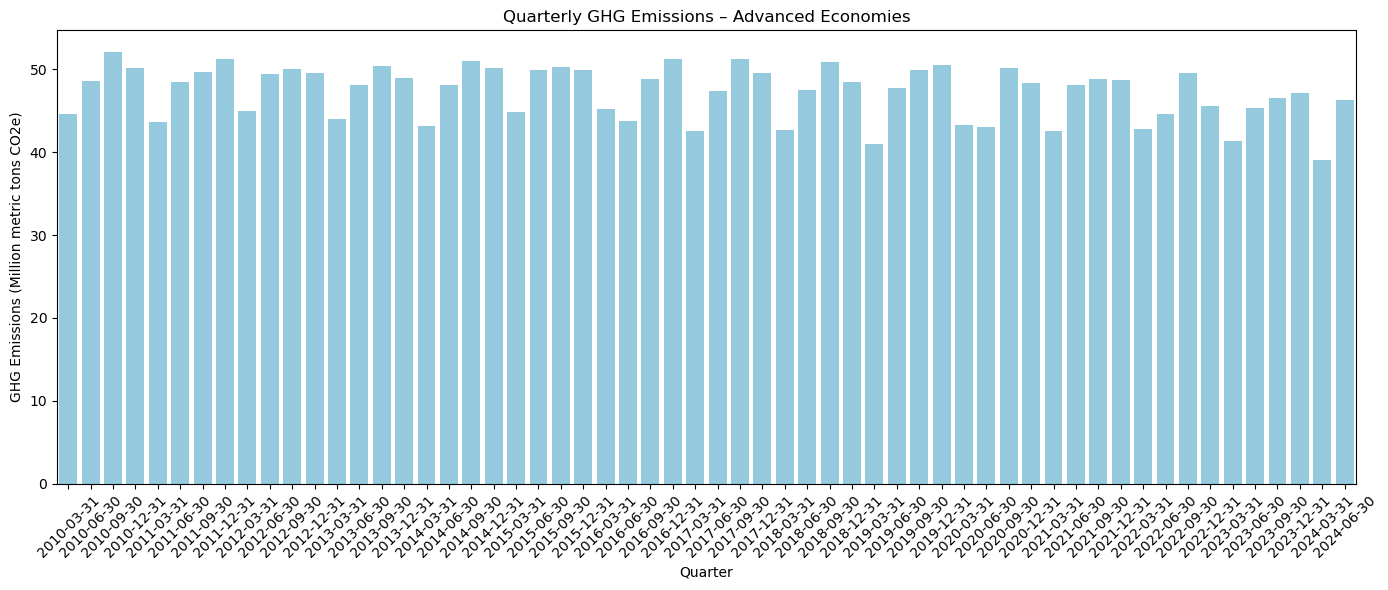

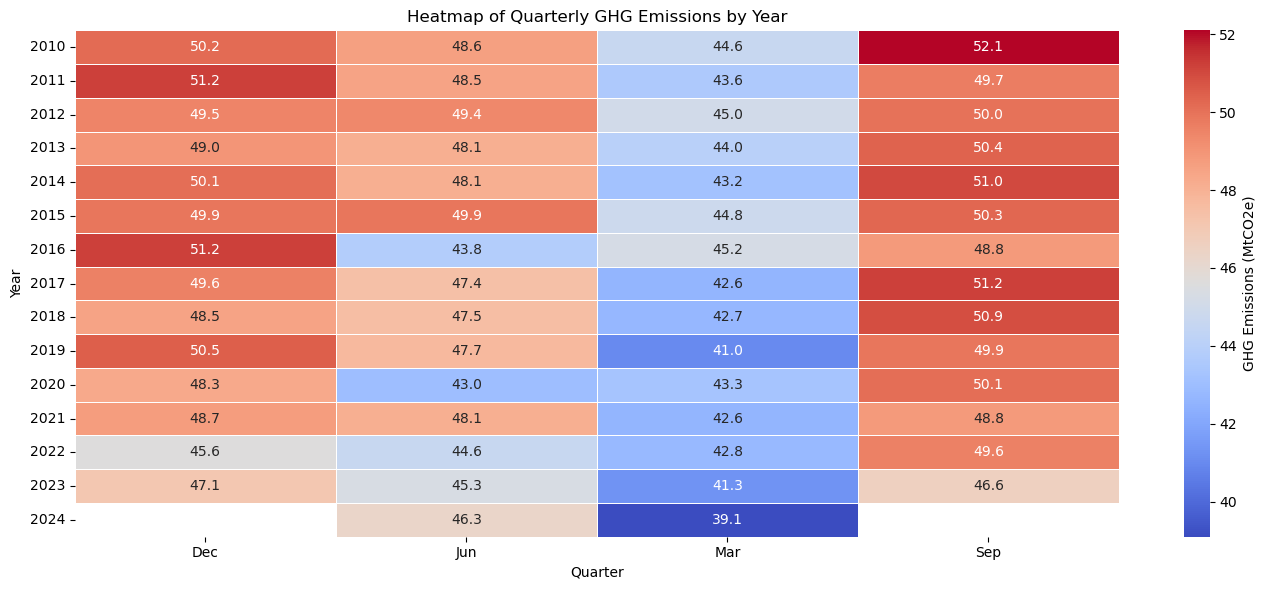

In [6]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the data
df = pd.read_csv('Indicator_1_1_quarterly_-7071251293967720840.csv')

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Connect to SQLite and save the cleaned data
with sqlite3.connect('cleaned_data.db') as conn:
    df.to_sql('greenhouse_gas_emissions', conn, if_exists='replace', index=False)
    print("Data saved to SQLite database!")

# Read data back from SQLite
df2 = pd.read_sql('SELECT * FROM greenhouse_gas_emissions', conn)

# Emission data and date generation
emissions = [
    44.6, 48.6, 52.1, 50.2, 43.6, 48.5, 49.7, 51.2, 45.0, 49.4, 50.0, 49.5,
    44.0, 48.1, 50.4, 49.0, 43.2, 48.1, 51.0, 50.1, 44.8, 49.9, 50.3, 49.9,
    45.2, 43.8, 48.8, 51.2, 42.6, 47.4, 51.2, 49.6, 42.7, 47.5, 50.9, 48.5,
    41.0, 47.7, 49.9, 50.5, 43.3, 43.0, 50.1, 48.3, 42.6, 48.1, 48.8, 48.7,
    42.8, 44.6, 49.6, 45.6, 41.3, 45.3, 46.6, 47.1, 39.1, 46.3
]
quarters = pd.date_range(start="2010-01-01", periods=len(emissions), freq='Q')

# Create DataFrame for emissions data
df_emissions = pd.DataFrame({
    'Quarter': quarters,
    'GHG Emissions (MtCO2e)': emissions
})

# Plot the bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=df_emissions, x='Quarter', y='GHG Emissions (MtCO2e)', color='skyblue')

# Customize plot labels and ticks
plt.title('Quarterly GHG Emissions – Advanced Economies')
plt.xlabel('Quarter')
plt.ylabel('GHG Emissions (Million metric tons CO2e)')
plt.xticks(rotation=45)

# Remove unnecessary .0 from y-axis ticks
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}' if x == int(x) else f'{x}'))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
ghg_df = pd.DataFrame({
    'Quarter': quarters,
    'GHG Emissions (MtCO2e)': emissions
})

# Pivot the data to have years as rows and quarters as columns
ghg_df['Year'] = ghg_df['Quarter'].dt.year
ghg_df['Quarter'] = ghg_df['Quarter'].dt.strftime('%b')  # Convert quarters to month names (Jan, Feb, etc.)

# Pivot the DataFrame to a matrix of Year vs Quarter
heatmap_data = ghg_df.pivot(index='Year', columns='Quarter', values='GHG Emissions (MtCO2e)')

# Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'GHG Emissions (MtCO2e)'})

# Add titles and labels
plt.title('Heatmap of Quarterly GHG Emissions by Year')
plt.xlabel('Quarter')
plt.ylabel('Year')

plt.tight_layout()
plt.show()

In [ ]:
iolumns if needed
    melted_df = melted_df[melted_df['Quarter'].str.contains('^\d{4}q[1-4]$', regex=True)]
    
    # Extract Year from Quarter for better grouping
    melted_df['Year'] = melted_df['Quarter'].str[:4]
    
    # Bar Chart by Gas Type (Average Emissions)
    plt.figure(figsize=(12, 6))
    sns.barplot(data=melted_df, x='gas_type', y='Emissions', hue='Year', 
                estimator='mean', errorbar=None, palette='viridis')
    plt.title('Average GHG Emissions by Gas Type')
    plt.xticks(rotation=45)
    plt.savefig(f"{STATIC_DIR}/gas_type_barchart.png")
    plt.close()
    
    # Line Chart (Quarterly Trends)
    plt.figure(figsize=(14, 6))
    for gas in melted_df['gas_type'].unique():
        subset = melted_df[melted_df['gas_type'] == gas]
        plt.plot(subset['Quarter'], subset['Emissions'], label=gas, marker='o')
    plt.title('Quarterly GHG Emissions Trends')
    plt.xticks(rotation=90)
    plt.legend()
    plt.savefig(f"{STATIC_DIR}/quarterly_trends.png")
    plt.close()
    
    # Heatmap (Quarterly Emissions by Gas Type)
    pivot_df = melted_df.pivot_table(index='gas_type', columns='Quarter', 
                                   values='Emissions')
    plt.figure(figsize=(16, 8))
    sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap='YlGnBu', 
               linewidths=.5)
    plt.title('GHG Emissions by Gas Type and Quarter')
    plt.savefig(f"{STATIC_DIR}/emissions_heatmap.png")
    plt.close()

if __name__ == '__main__':
    generate_charts()

<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
/var/folders/8h/yl2qxv0s2t9fvfb7r3khbqfc0000gp/T/ipykernel_34010/1060808266.py:19: SyntaxWarning: invalid escape sequence '\d'
  melted_df = melted_df[melted_df['Quarter'].str.contains('^\d{4}q[1-4]$', regex=True)]


DatabaseError: Execution failed on sql 'SELECT * FROM cleaned_data.db': no such table: cleaned_data.db

In [26]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
STATIC_DIR = '/Users/Anita/Website building_CSS_HTML/DE assignment_website create/static'

def generate_charts():
    # Step 1: Connect and load data
    with sqlite3.connect('cleaned_data.db') as conn:
        df = pd.read_sql('SELECT * FROM greenhouse_gas_emissions', conn)

    # Step 2: Melt the data (wide → long format)
    melted_df = df.melt(id_vars=['gas_type'], var_name='Quarter', value_name='Emissions')
    
    # Step 3: Filter only valid quarters (e.g., '2011q1', '2011q2', etc.)
    melted_df = melted_df[melted_df['Quarter'].str.contains(r'^\d{4}q[1-4]$', regex=True)]
    
    # Step 4: Add a 'Year' column for easier grouping
    melted_df['Year'] = melted_df['Quarter'].str[:4]

    # --- CHART 1: Bar Chart (Average Emissions by Gas Type) ---
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=melted_df,
        x='gas_type',
        y='Emissions',
        hue='Year',
        estimator='mean',
        errorbar=None,
        palette='viridis'
    )
    plt.title('Average GHG Emissions by Gas Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{STATIC_DIR}/gas_type_barchart.png")
    plt.close()

    # --- CHART 2: Line Chart (Quarterly Trends) ---
    plt.figure(figsize=(14, 6))
    for gas in melted_df['gas_type'].unique():
        subset = melted_df[melted_df['gas_type'] == gas]
        plt.plot(
            subset['Quarter'],
            subset['Emissions'],
            label=gas,
            marker='o'
        )
    plt.title('Quarterly GHG Emissions Trends')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{STATIC_DIR}/quarterly_trends.png")
    plt.close()

    # --- CHART 3: Heatmap (Emissions by Gas Type and Quarter) ---
    pivot_df = melted_df.pivot_table(
        index='gas_type',
        columns='Quarter',
        values='Emissions'
    )

    plt.figure(figsize=(16, 8))
    sns.heatmap(
        pivot_df,
        annot=True,
        fmt=".1f",
        cmap='YlGnBu',
        linewidths=.5
    )
    plt.title('GHG Emissions by Gas Type and Quarter')
    plt.tight_layout()
    plt.savefig(f"{STATIC_DIR}/emissions_heatmap.png")
    plt.close()


In [ ]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('cleaned_data.db')

tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

print(tables)

conn.close()



                       name
0  greenhouse_gas_emissions
